In [ ]:
# Import necessary libraries

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a styling
plt.style.use('ggplot')

# Load the dataset
file_path = r"C:\Users\Sumit Kumar\Downloads\synthetic_customer_transactions.csv" 
df = pd.read_csv(file_path)

print(df.head())

print(df.info())

  customer_id   age  gender        income  purchase_amount     category  \
0    CUST0001  56.0  Female  47478.938162       265.656341  Electronics   
1    CUST0002  69.0    Male  54277.629870       401.371137         Toys   
2    CUST0003  46.0    Male  42921.203881       489.571061  Electronics   
3    CUST0004  32.0    Male  53258.097168       420.695485  Electronics   
4    CUST0005  60.0    Male  42921.837138       434.161911  Electronics   

  transaction_date  loyalty_score payment_method repeat_customer  
0       2023-01-01           21.0         Crypto              No  
1       2023-01-02           47.0     Debit Card             Yes  
2       2023-01-03           80.0           Cash              No  
3       2023-01-04           59.0         PayPal             Yes  
4       2023-01-05           84.0         Crypto              No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dty

In [ ]:
# --- 1. Data Cleaning ---

In [ ]:
# --- 1.1 Handling Missing Values ---

In [20]:
# Check for missing values
print(df.isnull().sum())

# Impute missing 'age' values with the median
df['age'] = df['age'].fillna(df['age'].median())

# Impute missing 'category' values with the mode
df['category'] = df['category'].fillna(df['category'].mode()[0]) # mode() returns a Series, so take the first element.

# Impute missing 'loyalty_score' values with the mean
df['loyalty_score'] = df['loyalty_score'].fillna(df['loyalty_score'].mean())

# Display the missing values after imputation
print(df.isnull().sum())

customer_id          0
age                 11
gender               0
income               0
purchase_amount      0
category             0
transaction_date     0
loyalty_score       10
payment_method       0
repeat_customer      0
dtype: int64
customer_id         0
age                 0
gender              0
income              0
purchase_amount     0
category            0
transaction_date    0
loyalty_score       0
payment_method      0
repeat_customer     0
dtype: int64


In [ ]:
# --- 1.3 Detect and Treat Outliers ---

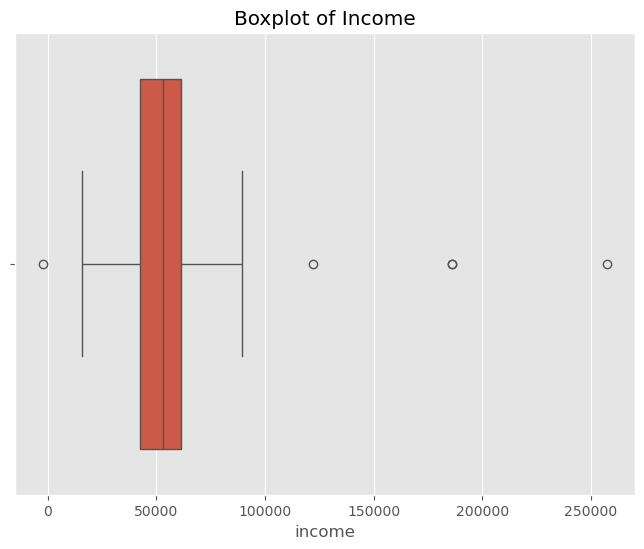

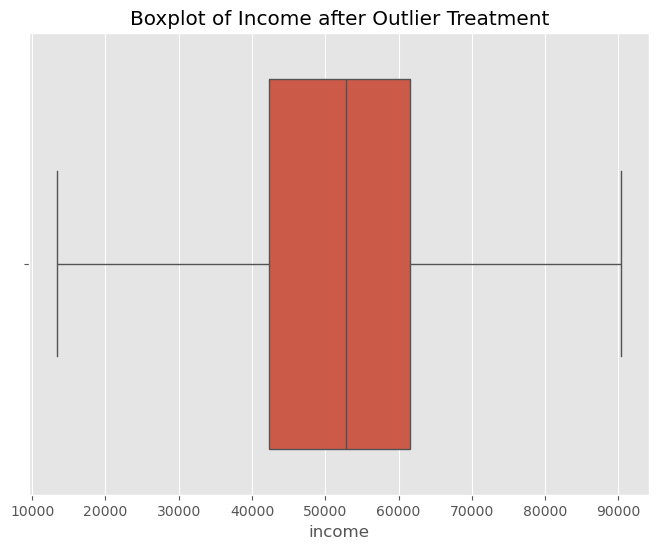

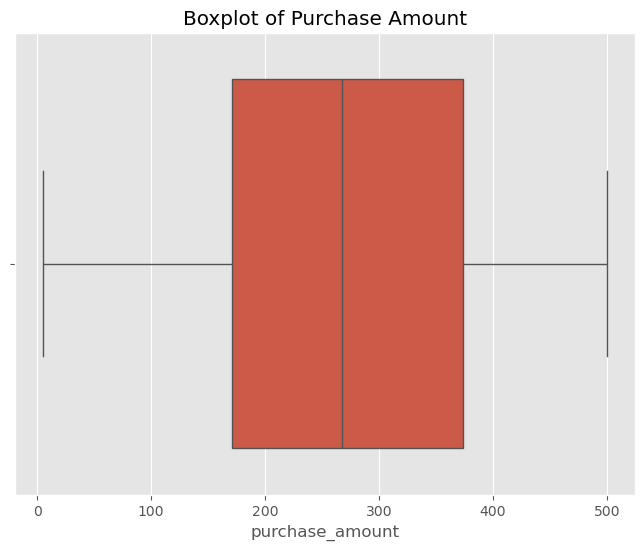

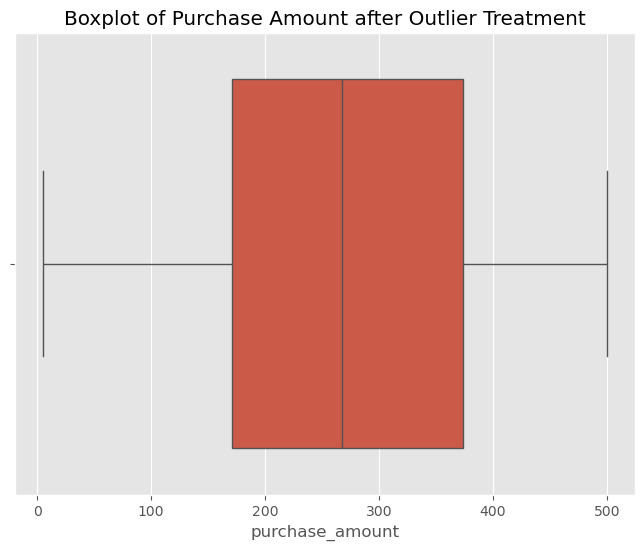

In [22]:
# --- 1.3.1 Outlier detection for 'income' using boxplot ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['income'])
plt.title('Boxplot of Income')
plt.show()

# --- 1.3.2 Handling Outliers in 'income' using IQR method ---
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['income'] = np.where(df['income'] < lower_bound, lower_bound, df['income'])
df['income'] = np.where(df['income'] > upper_bound, upper_bound, df['income'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['income'])
plt.title('Boxplot of Income after Outlier Treatment')
plt.show()

# --- 1.3.3 Outlier detection for 'purchase_amount' using boxplot ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['purchase_amount'])
plt.title('Boxplot of Purchase Amount')
plt.show()

# --- 1.3.4 Handling Outliers in 'purchase_amount' using IQR method ---
Q1 = df['purchase_amount'].quantile(0.25)
Q3 = df['purchase_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['purchase_amount'] = np.where(df['purchase_amount'] < lower_bound, lower_bound, df['purchase_amount'])
df['purchase_amount'] = np.where(df['purchase_amount'] > upper_bound, upper_bound, df['purchase_amount'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['purchase_amount'])
plt.title('Boxplot of Purchase Amount after Outlier Treatment')
plt.show()

In [24]:
# --- 1.4 Standardize Categorical Values ---

# Correcting inconsistencies in 'gender'
df['gender'] = df['gender'].replace({'Male': 'M', 'Female': 'F'})

# Convert gender to uppercase for consistency
df['gender'] = df['gender'].str.upper()

# Correcting inconsistencies in 'payment_method'
df['payment_method'] = df['payment_method'].replace({'Debit Card': 'DebitCard', 'Credit Card': 'CreditCard'})

# Correcting inconsistencies in 'repeat_customer'
df['repeat_customer'] = df['repeat_customer'].replace({'Yes': True, 'No': False})

# Display value counts for categorical columns to verify standardization
print("Gender Value Counts:\n", df['gender'].value_counts())
print("\nPayment Method Value Counts:\n", df['payment_method'].value_counts())
print("\nRepeat Customer Value Counts:\n", df['repeat_customer'].value_counts())

Gender Value Counts:
 gender
M        96
F        91
OTHER    23
Name: count, dtype: int64

Payment Method Value Counts:
 payment_method
Crypto        50
DebitCard     45
Cash          42
CreditCard    39
PayPal        34
Name: count, dtype: int64

Repeat Customer Value Counts:
 repeat_customer
True     121
False     89
Name: count, dtype: int64


C:\Users\Sumit Kumar\AppData\Local\Temp\ipykernel_19540\2202315069.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['repeat_customer'] = df['repeat_customer'].replace({'Yes': True, 'No': False})


In [ ]:
# --- 2. Exploratory Data Analysis (EDA) ---


Summary Statistics for Numerical Variables:
               age        income  purchase_amount  loyalty_score
count  210.000000    210.000000       210.000000     210.000000
mean    43.647619  52840.605594       264.150958      49.045000
std     14.806232  16308.551128       139.142295      28.493649
min     18.000000  13444.671330         5.117574       1.000000
25%     31.000000  42286.346551       171.316044      24.000000
50%     44.000000  52871.472365       267.481241      49.045000
75%     56.000000  61514.130031       373.388973      74.000000
max     69.000000  90355.805252       499.679982     100.000000

Frequency Distribution for gender:
 gender
M        96
F        91
OTHER    23
Name: count, dtype: int64

Frequency Distribution for category:
 category
Grocery           48
Toys              46
Clothing          42
Electronics       38
Home & Kitchen    36
Name: count, dtype: int64

Frequency Distribution for payment_method:
 payment_method
Crypto        50
DebitCard     45

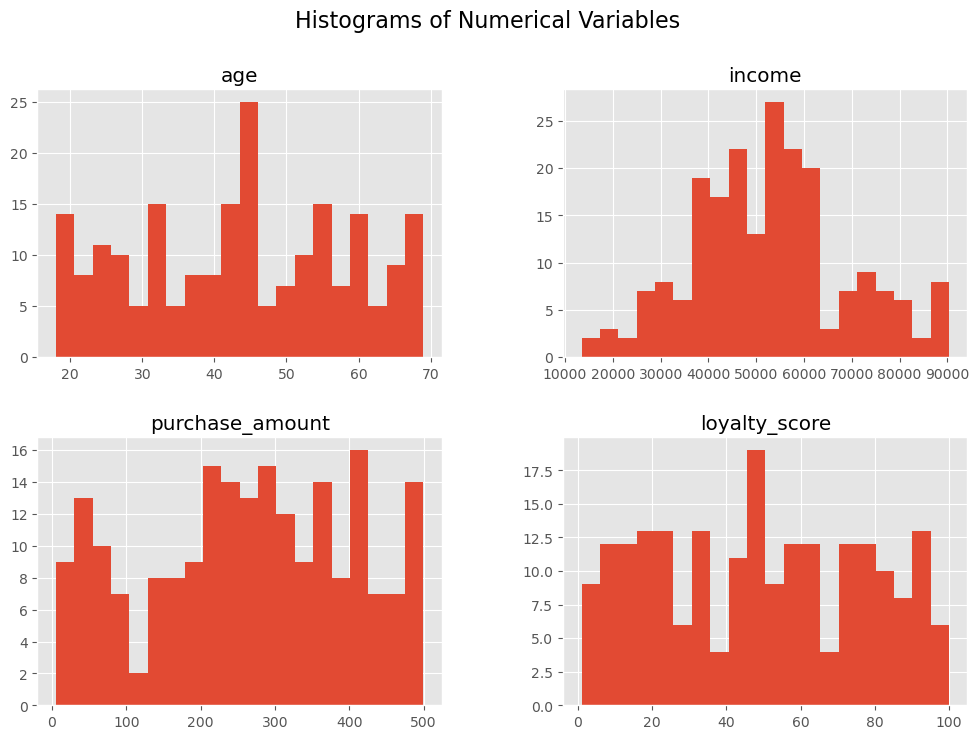

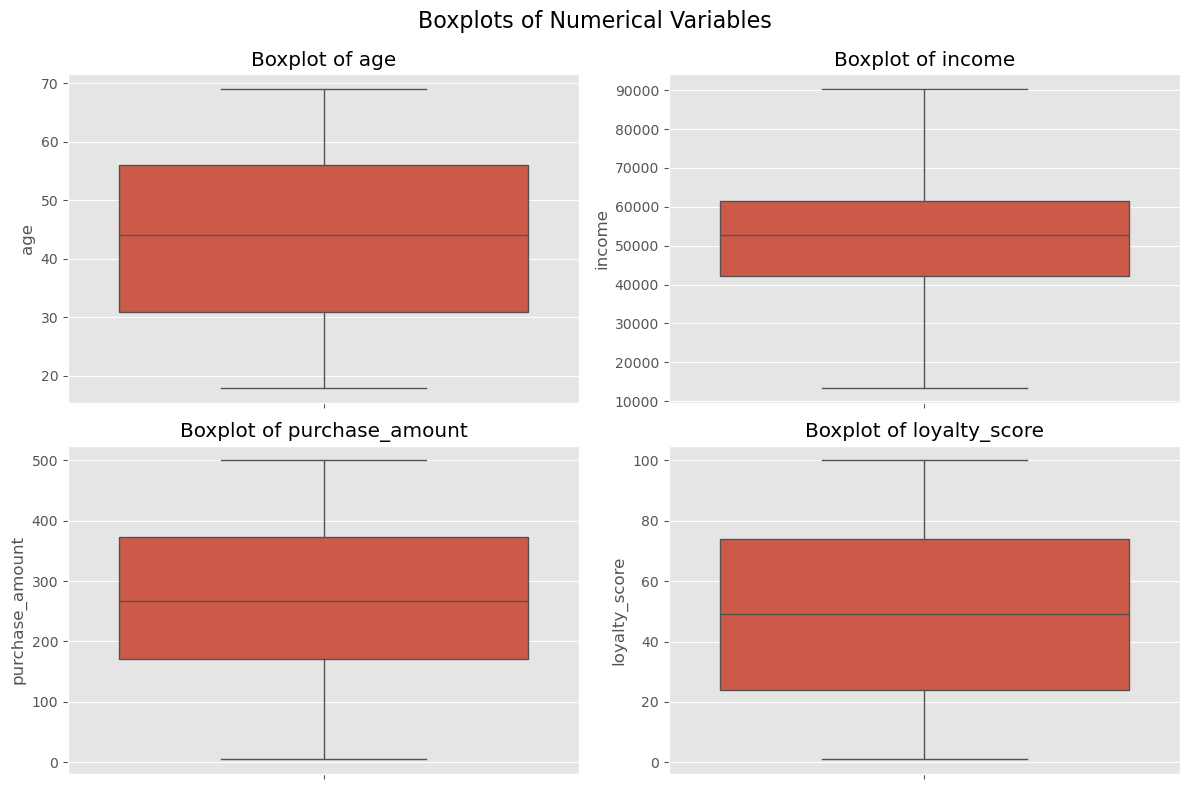

In [26]:
# --- 2.1 Univariate Analysis ---

# --- 2.1.1 Summary Statistics for Numerical Variables ---
print("\nSummary Statistics for Numerical Variables:\n", df.describe())

# --- 2.1.2 Frequency Distributions for Categorical Variables ---
for column in ['gender', 'category', 'payment_method', 'repeat_customer']:
    print(f"\nFrequency Distribution for {column}:\n", df[column].value_counts())

# --- 2.1.3 Histograms for Numerical Variables ---
numerical_cols = ['age', 'income', 'purchase_amount', 'loyalty_score']
df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

# --- 2.1.4 Box Plots for Numerical Variables ---
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Boxplots of Numerical Variables", fontsize=16)
plt.show()

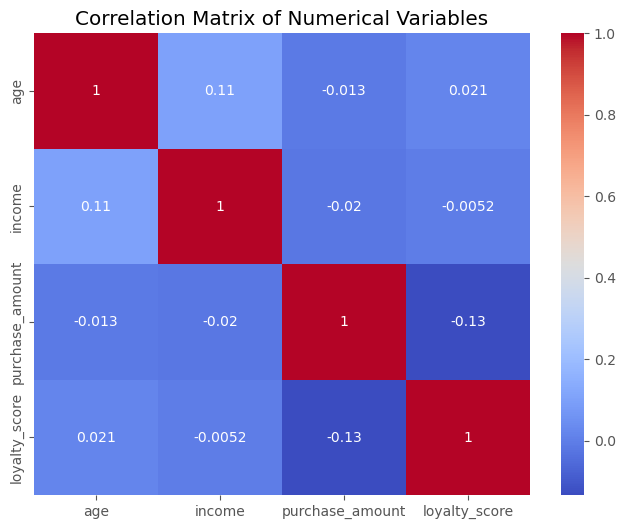

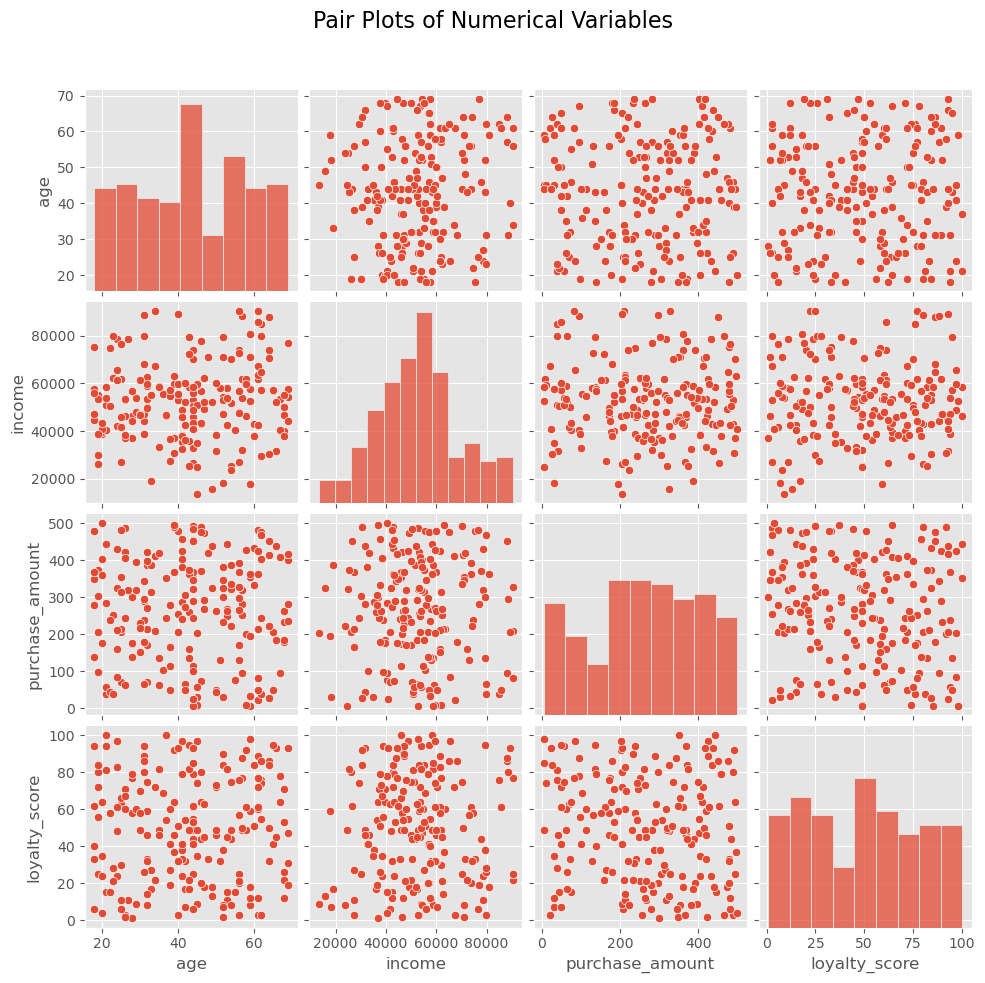

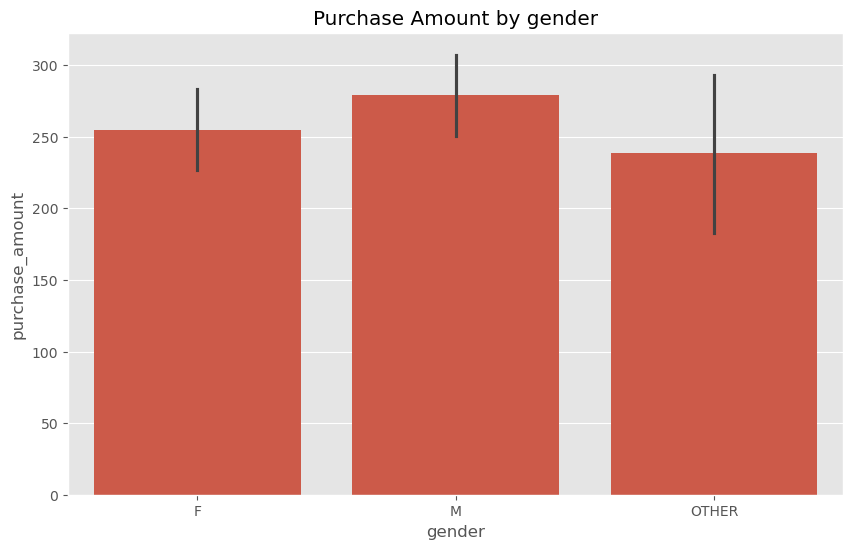

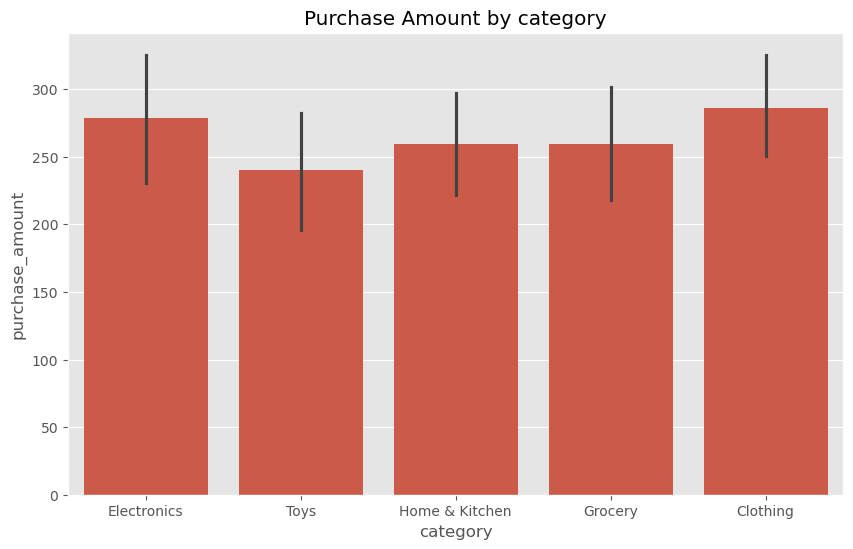

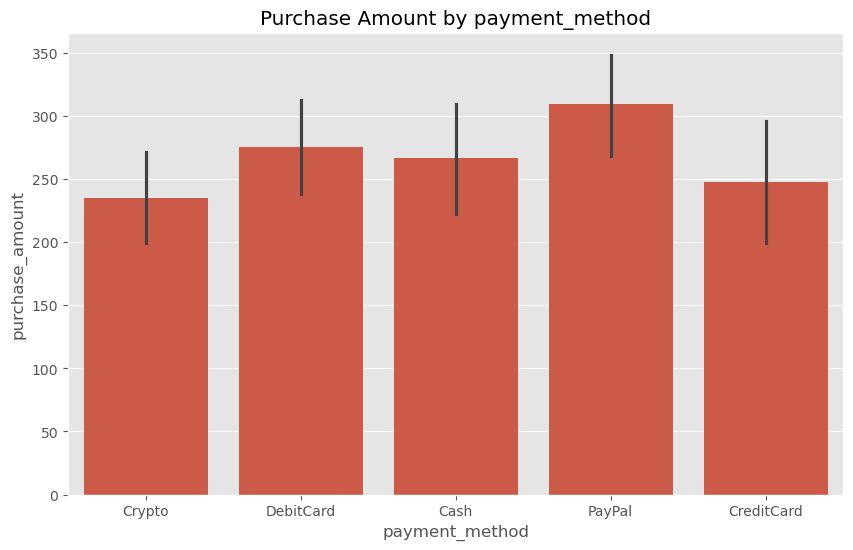

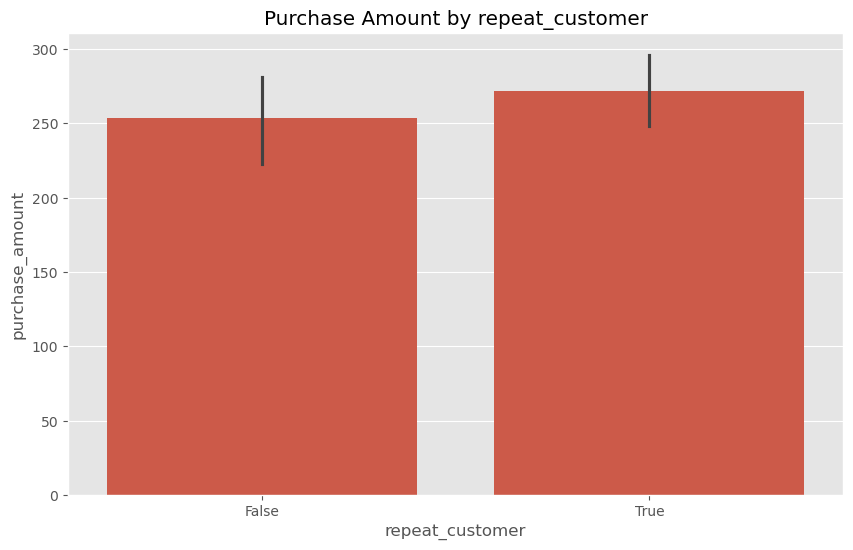

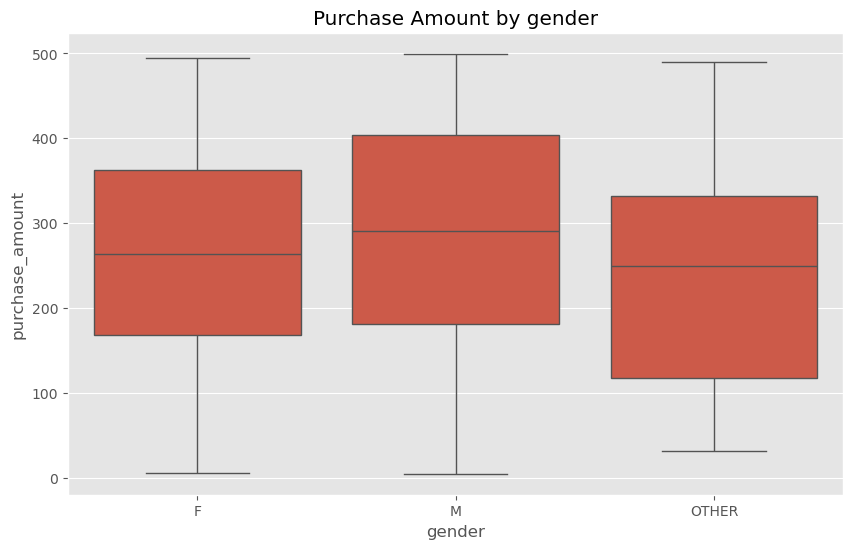

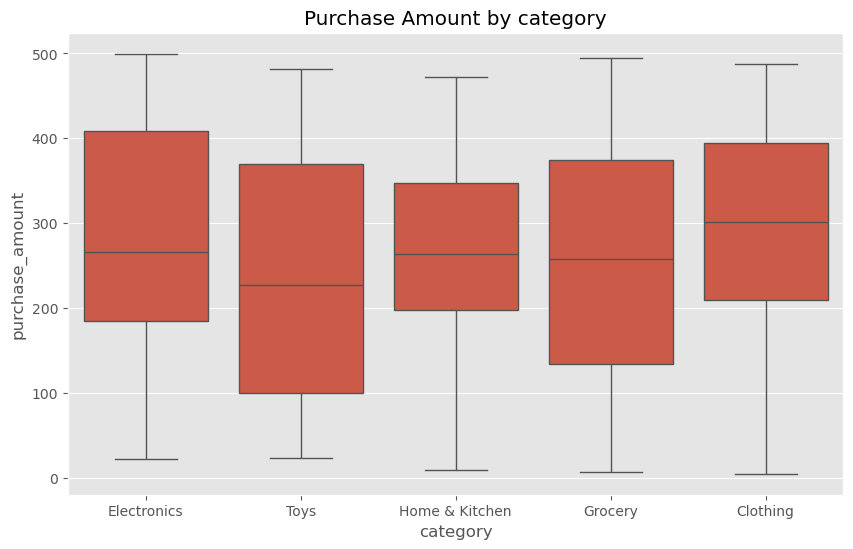

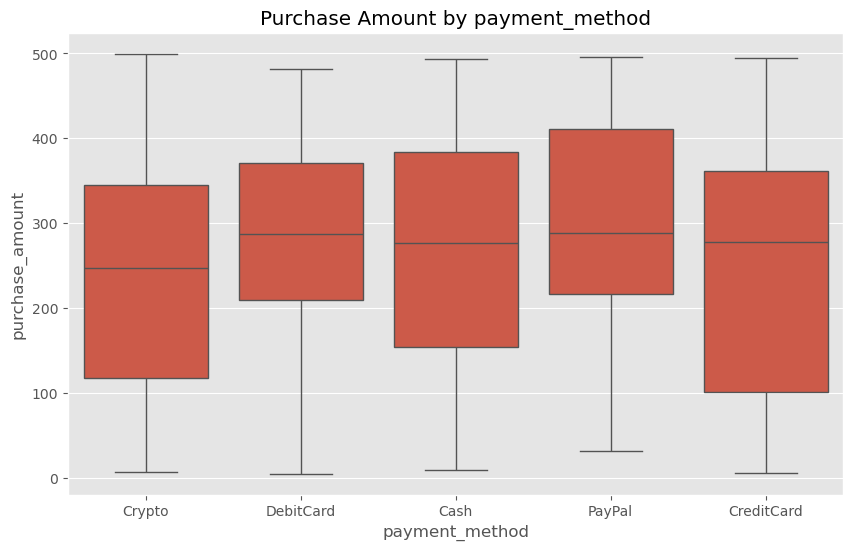

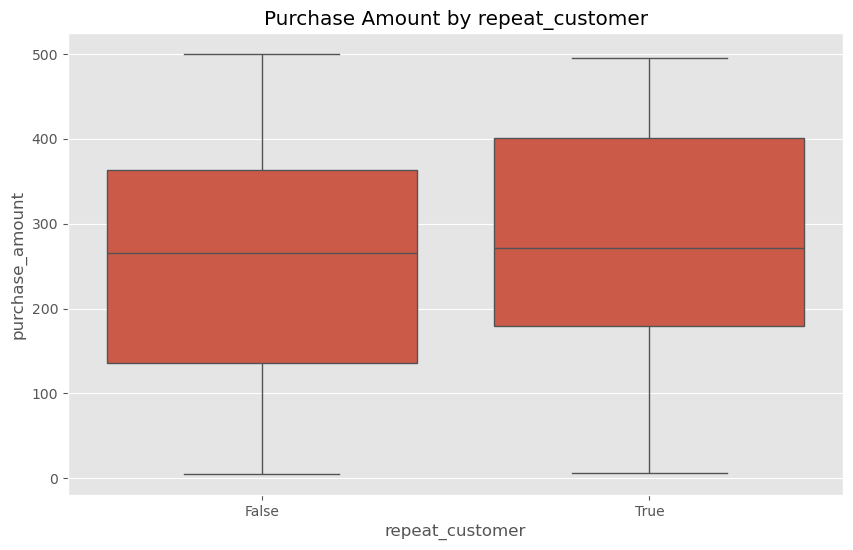

In [28]:
# --- 2.2 Bivariate Analysis ---

# --- 2.2.1 Correlation Matrix (Numerical Variables) ---
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# --- 2.2.2 Scatter Plots (Continuous Variable Relationships) ---
sns.pairplot(df[numerical_cols])
plt.suptitle("Pair Plots of Numerical Variables", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

# --- 2.2.3 Bar Plots (Categorical vs Numerical) ---
categorical_cols = ['gender', 'category', 'payment_method', 'repeat_customer']
for cat_col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_col, y='purchase_amount', data=df)
    plt.title(f'Purchase Amount by {cat_col}')
    plt.show()

# --- 2.2.4 Box Plots (Categorical vs Numerical) ---
for cat_col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y='purchase_amount', data=df)
    plt.title(f'Purchase Amount by {cat_col}')
    plt.show()

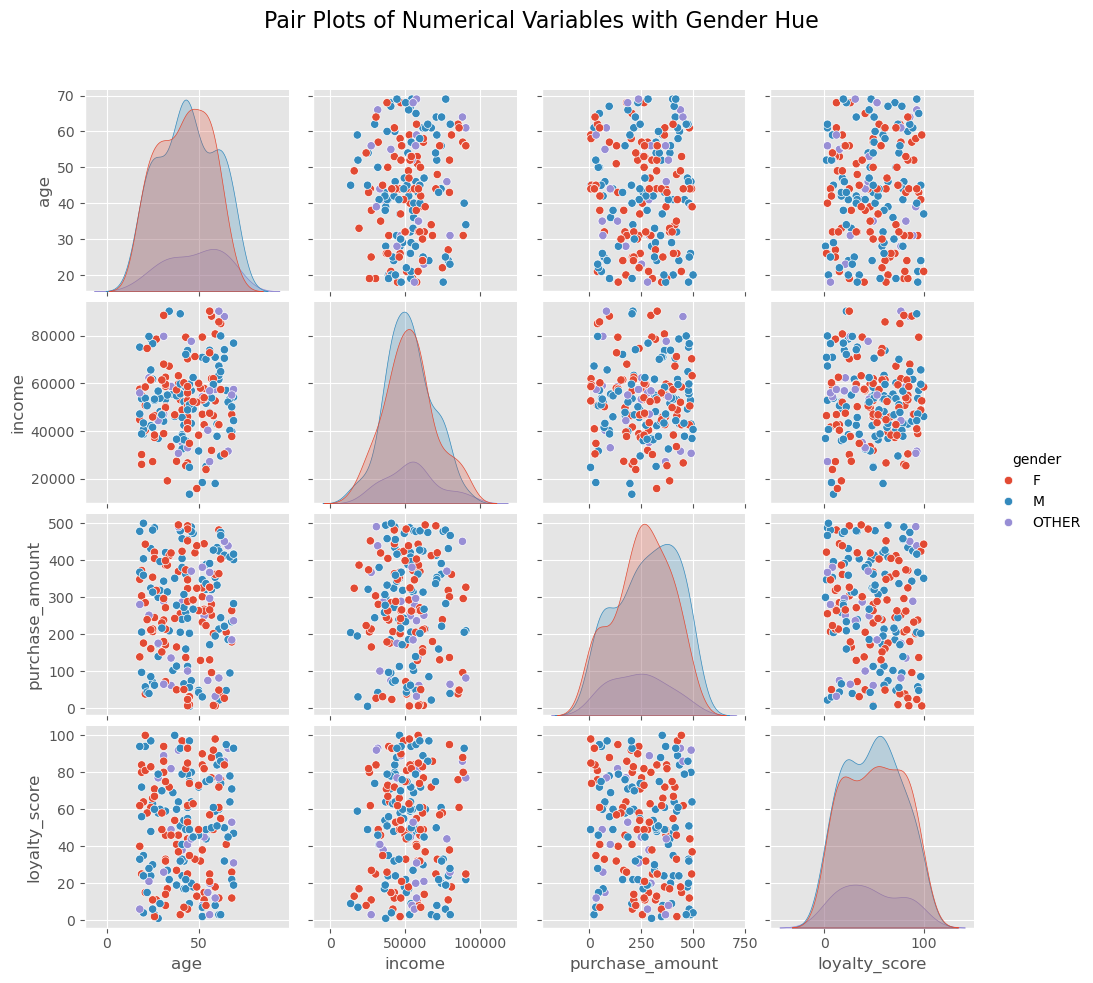

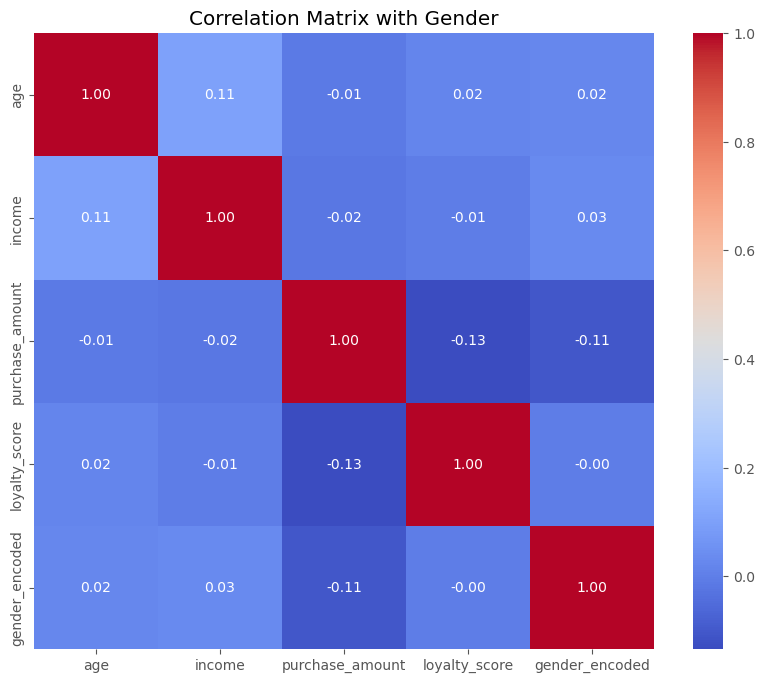


Average Purchase Amount by Gender and Category:
 category    Clothing  Electronics     Grocery  Home & Kitchen        Toys
gender                                                                   
F         281.527125   277.525259  261.607708      246.313797  203.759802
M         294.470404   278.843788  273.851872      288.124347  263.651797
OTHER     264.107538   286.505277  203.871624      100.336519  247.382061


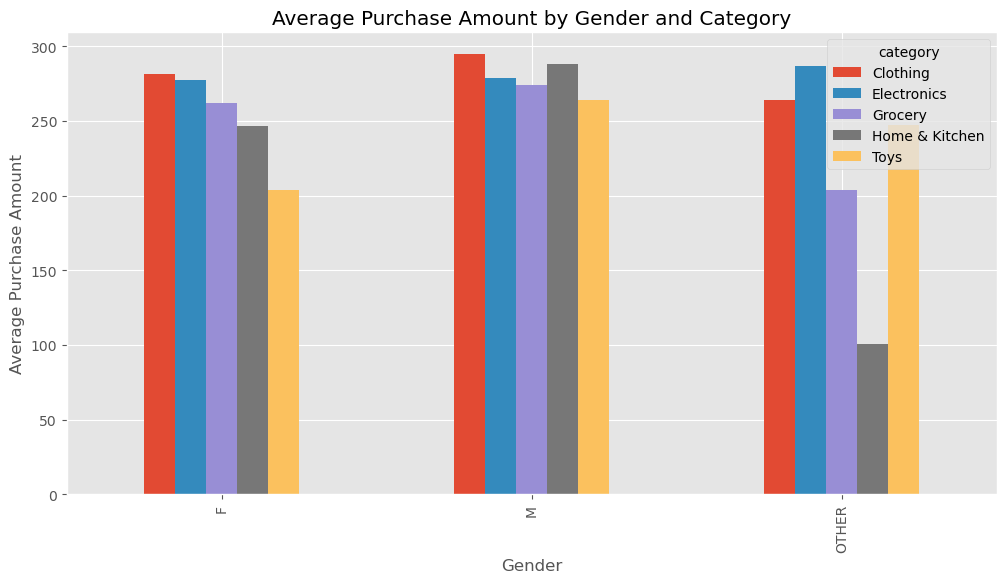

In [30]:
# --- 2.3 Multivariate Analysis ---

# --- 2.3.1 Pair Plots with Hue (Categorical Variable) ---
sns.pairplot(df, hue='gender', vars=numerical_cols)
plt.suptitle("Pair Plots of Numerical Variables with Gender Hue", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

# --- 2.3.2 Heatmap (Correlation with a Categorical Variable as Hue) ---
# Example: Convert 'gender' to numerical for correlation (0 for Male, 1 for Female, 2 for Other)
df['gender_encoded'] = df['gender'].map({'M': 0, 'F': 1, 'OTHER': 2}).astype(int)  # Handle "Other" if it exists

# Calculate correlation matrix including 'gender_encoded'
correlation_matrix = df[['age', 'income', 'purchase_amount', 'loyalty_score', 'gender_encoded']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Gender')
plt.show()

# --- 2.3.3 Grouped Comparisons ---
# Example: Average purchase amount by gender and category
grouped_data = df.groupby(['gender', 'category'])['purchase_amount'].mean().unstack()
print("\nAverage Purchase Amount by Gender and Category:\n", grouped_data)

grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('Average Purchase Amount by Gender and Category')
plt.ylabel('Average Purchase Amount')
plt.xlabel('Gender')
plt.show()